In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# Get the list of S&P 500 constituents
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Retrieve historical data
df = yf.download(tickers, period='10y')
sp500 = df['Adj Close'].dropna(how='all', axis=1)


[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['-', 'BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [4]:
sp500

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-12,36.287403,23.992769,17.550741,34.780453,NaN,29.921343,19.126667,62.207405,53.990002,38.605907,...,152.177567,20.251881,62.024235,44.503731,29.433895,42.555946,80.667168,50.680000,23.125397,29.018286
2013-12-13,36.221741,24.728109,17.359432,34.767185,NaN,30.012041,19.006666,62.089832,60.889999,38.846642,...,154.102142,20.222721,61.991711,44.134712,29.697412,42.680756,81.124298,50.299999,22.876301,29.399984
2013-12-16,36.274281,25.086351,17.455555,35.431061,NaN,30.119221,19.023333,62.660843,58.500000,39.111454,...,155.000854,20.404970,63.234016,43.977875,29.767677,43.524754,81.025696,51.160000,22.948618,29.790985
2013-12-17,37.016304,24.605556,17.376968,35.603676,NaN,30.185175,18.956667,62.140213,57.669998,39.271935,...,154.712601,20.317492,62.928310,43.784138,29.952137,42.716415,81.231857,50.990002,22.554890,29.455843
2013-12-18,38.014427,24.728109,17.244841,36.061741,NaN,31.430191,19.206667,63.500587,59.040001,39.946007,...,158.265045,20.689293,64.742989,44.476055,30.479158,43.227577,83.176826,51.480000,23.157534,29.949259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06,128.910004,13.480000,192.320007,146.380005,135.309998,104.940002,79.970001,335.410004,595.700012,180.570007,...,82.400002,61.970001,99.110001,32.209999,106.099998,124.809998,116.129997,234.130005,37.150002,182.000000
2023-12-07,128.679993,13.910000,194.270004,147.970001,139.839996,104.050003,78.339996,335.100006,608.780029,184.380005,...,82.529999,61.549999,98.419998,32.480000,106.040001,124.269997,117.290001,233.229996,38.380001,181.830002
2023-12-08,127.199997,13.760000,195.710007,149.279999,140.679993,104.510002,79.300003,337.230011,610.010010,184.880005,...,84.190002,60.910000,99.550003,31.879999,106.379997,124.339996,117.300003,236.130005,38.930000,184.600006


In [5]:
# 20 Day lag. Change time_period before running code
time_period = 1260  # 1 year 252, 5 year 1260 
start_period = -20 - time_period
end_period = -20  
lagged_closed_price = sp500[start_period:end_period]
rolling_mean_price = sp500[-time_period:].rolling(window=time_period-252).mean().dropna(how='all')


Date
2022-12-09    128.776885
2022-12-12    128.914299
2022-12-13    129.056862
2022-12-14    129.195481
2022-12-15    129.327542
                 ...    
2023-12-06    203.649193
2023-12-07    204.059886
2023-12-08    204.478759
2023-12-11    204.888911
2023-12-12    205.304619
Name: NVDA, Length: 253, dtype: float64

In [12]:

# Function to calculate momentum factors
def calculate_momentum_factors(tickers, time_period):

    # Calculating 52 Week trend
    slope_info = pd.DataFrame(index = sp500.columns)
    for i in range(1,21):
        slope_info[i] = np.polyfit(range(len(rolling_mean_price[-i- 252: -i ])), rolling_mean_price[-i-252 : -i], 1)[0]  
    _52_week_trend = slope_info.mean(axis=1) 


    # Percent above 260 day Low
    percent_above_260 = (lagged_closed_price - lagged_closed_price.rolling(window=260).min()) / lagged_closed_price.rolling(window=260).min() * 100
    percent_above_260 = percent_above_260.dropna(how='all').mean()

    # Oscillator calculations
    oscillator = (lagged_closed_price.rolling(window=4*5).mean() - lagged_closed_price.rolling(window=52*5).mean()) / lagged_closed_price.rolling(window=52*5).mean() * 100
    oscillator = oscillator.dropna(how='all').mean()    

    # 39 week returns
    _39_week_return = lagged_closed_price.pct_change(periods=39*5)
    _39_week_return= _39_week_return.dropna(how='all').mean()    

    # Volume Price Trend
    volume = df['Volume'].dropna(how='all', axis=1)[start_period:end_period]
    weekly_means = lagged_closed_price.rolling(5).mean()
    weekly_volume = volume[start_period:end_period].rolling(5).mean()
    volume_price_trend = (weekly_means.pct_change() * weekly_volume).mean()
    

    # Creating the DataFrame
    new_table = pd.DataFrame(index=sp500.transpose().index)
    new_table['Slope 52 Week Trend-Line'] = _52_week_trend
    new_table['Percent above 260 Day Low'] = percent_above_260
    new_table['4/52 Week Oscillator'] = oscillator
    new_table['39_Week_Return'] = _39_week_return
    new_table['51 Week Volume Price Trend'] = volume_price_trend

    return new_table



In [13]:
momentum_factors = calculate_momentum_factors(tickers, time_period)
momentum_factors



,Slope 52 Week Trend-Line,Percent above 260 Day Low,4/52 Week Oscillator,39_Week_Return,51 Week Volume Price Trend
A,0.055072,38.382145,7.125966,0.137078,127.288178
AAL,-0.015895,44.122800,-6.909119,-0.051484,61182.414836
AAPL,0.122740,60.663183,15.986626,0.314887,75438.405877
ABBV,0.082660,40.513194,10.745892,0.175105,1099.288674
ABNB,NaN,32.404214,-6.202458,-0.049052,-1820.673380
...,...,...,...,...,...
YUM,0.032792,36.516529,3.358363,0.081347,93.875404
ZBH,0.010914,35.073644,0.689676,0.042391,-742.486230
ZBRA,0.077441,58.096262,4.983993,0.150996,-292.296608
ZION,-0.005830,52.432163,-0.662576,0.032493,-4880.763788


In [14]:
z_scores = (momentum_factors - momentum_factors.mean()) / momentum_factors.std()
z_scores = z_scores.sum(axis=1)



In [26]:
z_scores.sort_values(ascending=False, inplace= True)
long_basket= z_scores[:10]
short_basket = z_scores[-10:]

print("Long Basket:")
print (long_basket)
print("Short Basket:") 
print(short_basket)

Long Basket:
TSLA    43.112659
MRNA    20.350811
ENPH    19.162555
NVDA    16.052076
NVR     15.573304
AMD     10.146412
AZO      9.845765
CMG      9.678539
SEDG     8.229572
FCX      8.150968
dtype: float64
Short Basket:
MMM    -5.289826
BXP    -5.290819
VZ     -5.296504
WBA    -5.517204
BAX    -5.952063
PARA   -6.070260
FIS    -6.116725
WBD    -6.217212
VTRS   -6.572595
VFC    -7.614915
dtype: float64


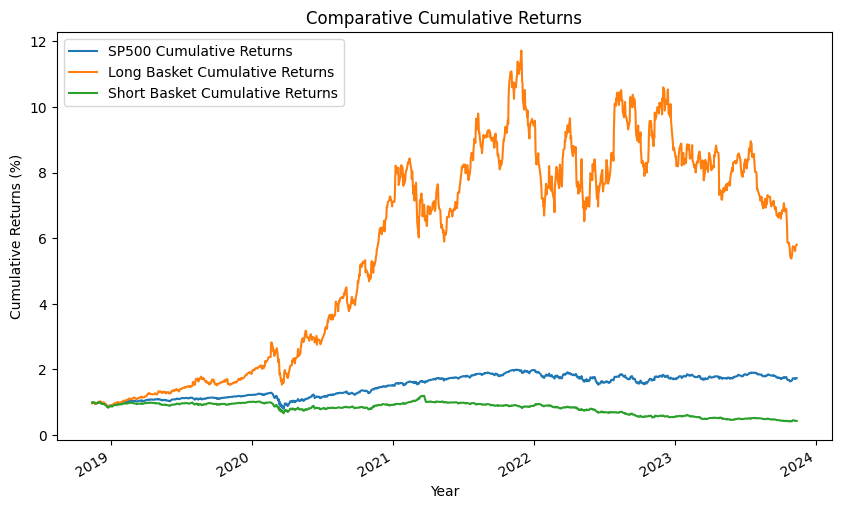

In [27]:
#Back-Test period of time_period year (20 Day Lag)

long_list =long_basket.index
short_list= short_basket.index

long_basket_close =sp500[start_period:end_period][long_list]
short_basket_close =sp500[start_period:end_period][short_list]


# I should make this next part a function, for autonomy
returns = sp500[start_period:end_period].pct_change()
cumulative_returns = (1 + returns).cumprod().mean(axis=1)


long_returns = long_basket_close.pct_change()
long_cumulative_returns = (1+long_returns).cumprod().mean(axis=1)

short_returns = short_basket_close.pct_change()
short_cumulative_returns = (1+short_returns).cumprod().mean(axis=1)



plt.figure(figsize=(10,6))
cumulative_returns.plot(label='SP500 Cumulative Returns')
long_cumulative_returns.plot(label='Long Basket Cumulative Returns')
short_cumulative_returns.plot(label='Short Basket Cumulative Returns')

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()




# There is an issue with the way I'm graphing cumulative returns. The spread gets bigger as time increases.
